# <div align="center" style="color: #ff5733;">All Active Loan Extract</div>

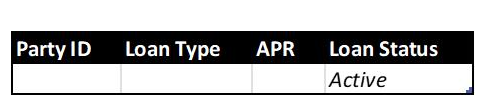

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

In [2]:
sq = """select customerId,
digitalLoanAccountId,
loanAccountNumber,
format_date('%m/%d/%Y',disbursementDateTime) Bookingdate,
    case when reloan_flag = 1 and loantype not like 'FLEXUP'then 'Reloan'
         when loantype = 'FLEXUP' and new_loan_type = 'Flex-up' and reloan_flag = 0 and flagDisbursement = 1 then 'Flex-up' 
                  else new_loan_type end as LoanProduct,
rateOfInterest,
loanPaidStatus loan_status,
flagDisbursement
from `risk_credit_mis.loan_master_table`
where loanPaidStatus in ('In Arrears', 'Normal')
and flagDisbursement = 1
order by customerId, loanAccountNumber, disbursementDateTime desc
"""

activeloans = client.query(sq).to_dataframe(progress_bar_type='tqdm')
print(f"The rows and columns downloaded in activeloans are:\t {activeloans.shape}")

Job ID e5f3dafc-928c-42f3-8afe-7d8eca76030b successfully executed: 100%|██████████|
Downloading: 100%|██████████|
The rows and columns downloaded in activeloans are:	 (51651, 8)


In [3]:
activeloans.to_excel("Activeloans_all_20240208.xlsx", sheet_name='Rawdata', index=False)